In [1]:
# Importing necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

# Visualization style
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# Data Overview

In [2]:
df = pd.read_csv('Dataset1_TranscriptMahasiswa.csv', delimiter = ';')

In [3]:
df.head()

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE
0,10110310002,2010,1011,EM100,EM100 Dasar-dasar Bisnis,3,57.0,C
1,10110310002,2010,1011,EM180,EM180 Matematika Bisnis,3,70.0,B
2,10110310002,2010,1011,TI100,TI100 Algoritma dan Pemrograman,4,57.0,C
3,10110310002,2010,1011,TI101,TI101 Matematika Diskrit,3,59.0,C
4,10110310002,2010,1011,TI110,TI110 Pengantar Teknologi Multimedia,3,74.0,B


In [4]:
df.shape

(30870, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30870 entries, 0 to 30869
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NIM       30870 non-null  int64  
 1   ANGKATAN  30870 non-null  int64  
 2   SEMESTER  30870 non-null  int64  
 3   KODE_MK   30870 non-null  object 
 4   NAMA_MK   30847 non-null  object 
 5   SKS       30870 non-null  int64  
 6   NILAI     30858 non-null  float64
 7   GRADE     30318 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 1.9+ MB


In [6]:
# we are going to change the datatype of 'NIM', 'ANGKATAN', and 'SEMESTER' to str
df['NIM'] = df['NIM'].astype('str')
df['ANGKATAN'] = df['ANGKATAN'].astype('str')
df['SEMESTER'] = df['SEMESTER'].astype('str')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30870 entries, 0 to 30869
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NIM       30870 non-null  object 
 1   ANGKATAN  30870 non-null  object 
 2   SEMESTER  30870 non-null  object 
 3   KODE_MK   30870 non-null  object 
 4   NAMA_MK   30847 non-null  object 
 5   SKS       30870 non-null  int64  
 6   NILAI     30858 non-null  float64
 7   GRADE     30318 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 1.9+ MB


In [8]:
df.describe()

,SKS,NILAI
count,30870.000000,30858.000000
mean,2.838063,74.357930
std,0.564980,15.650969
min,2.000000,0.000000
25%,3.000000,66.000000
50%,3.000000,74.000000
75%,3.000000,85.000000
max,6.000000,100.000000


In [9]:
df.isnull().sum()

NIM           0
ANGKATAN      0
SEMESTER      0
KODE_MK       0
NAMA_MK      23
SKS           0
NILAI        12
GRADE       552
dtype: int64

# EDA

In [11]:
# Grade Distribution per Angkatan
df['ANGKATAN'].unique()

array(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018'], dtype=object)

<AxesSubplot:xlabel='GRADE', ylabel='count'>

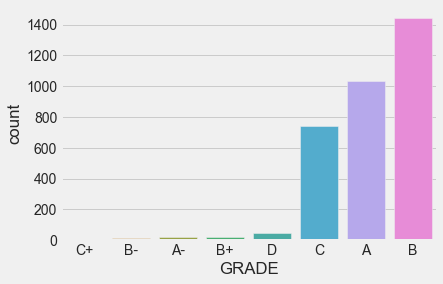

In [12]:
sns.countplot(data = df[df['ANGKATAN'] == '2010'], x = 'GRADE', order = df[df['ANGKATAN'] == '2010']['GRADE'].value_counts(ascending = True).index)

<AxesSubplot:xlabel='GRADE', ylabel='count'>

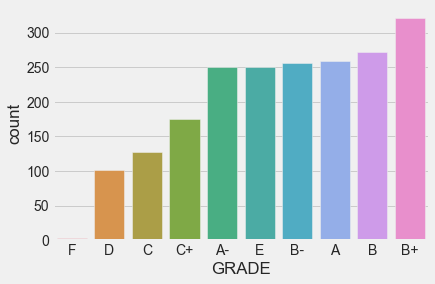

In [13]:
sns.countplot(data = df[df['ANGKATAN'] == "2018"], x = 'GRADE', order = df[df['ANGKATAN'] == "2018"]['GRADE'].value_counts(ascending = True).index)

In [14]:
df_EDF = df.loc[(df['GRADE'] == 'D') | (df['GRADE'] == 'E') | (df['GRADE'] == 'F')]
df_EDF.head()

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE
48,10110310002,2010,1322,SI325,SI325 Konsep Sistem Operasi,3,50.0,D
88,10110310004,2010,1311,SI521,Analisis & Perancangan SI Lanjutan,3,50.0,D
156,10110310006,2010,1021,IK402,IK402 Komunikasi Interpersonal,2,53.0,D
205,10110310007,2010,1021,IK402,IK402 Komunikasi Interpersonal,2,47.0,D
289,10110310008,2010,1311,TI532,Pemrograman Web,3,47.0,D


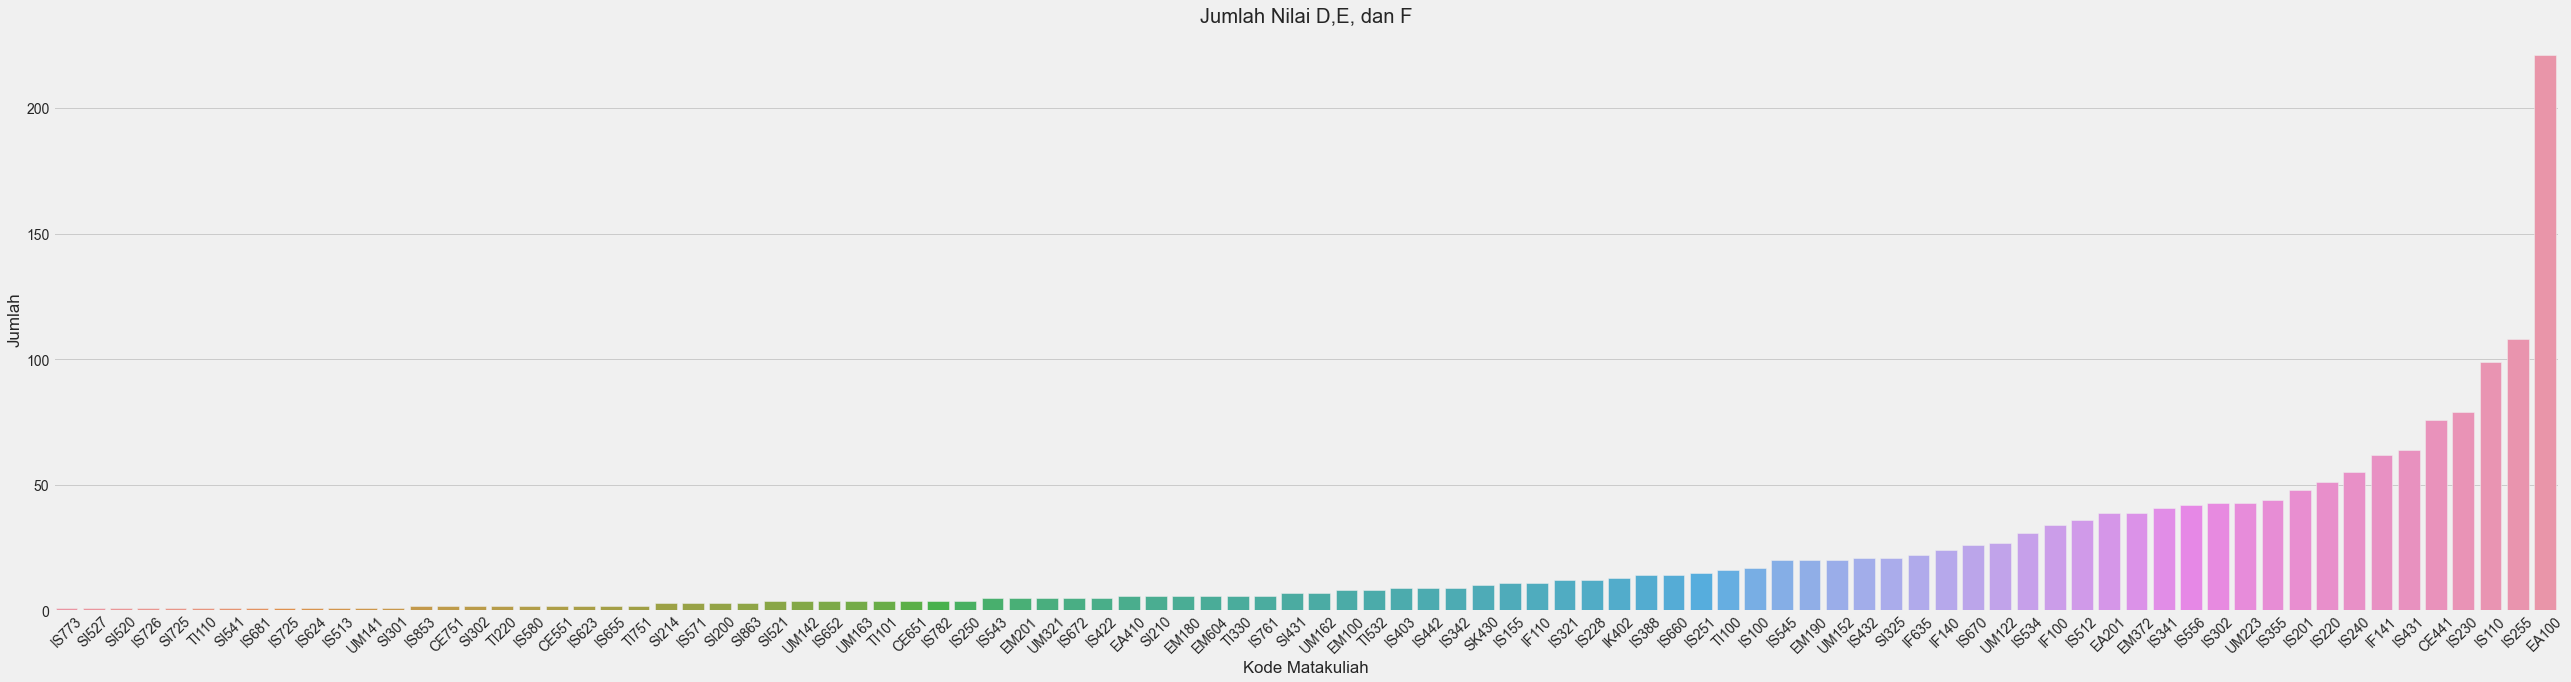

In [15]:
plt.figure(figsize=(40,10))
sns.countplot(data = df_EDF, x = 'KODE_MK', order = df_EDF['KODE_MK'].value_counts(ascending = True).index)
plt.title('Jumlah Nilai D,E, dan F')

plt.xlabel('Kode Matakuliah')
plt.ylabel('Jumlah')
plt.xticks(rotation = 45)

plt.show()

# Data Cleaning

In [11]:
df.isnull().sum()

NIM           0
ANGKATAN      0
SEMESTER      0
KODE_MK       0
NAMA_MK      23
SKS           0
NILAI         0
GRADE       552
dtype: int64

In [10]:
# Nilai
df.loc[(df['NILAI'].isnull() == True)]['GRADE'].value_counts()

# Assume that F grade means that the score is 0
# since there are only F for NILAI column with null values
df['NILAI'] = df['NILAI'].fillna(0)

In [12]:
df.isnull().sum()

NIM           0
ANGKATAN      0
SEMESTER      0
KODE_MK       0
NAMA_MK      23
SKS           0
NILAI         0
GRADE       552
dtype: int64

In [13]:
# Grade
def nilai_grade(nilai):
    if 85 <= nilai <= 100:
        return 'A'
    elif 80 <= nilai < 85:
        return 'A-'
    elif 75 <= nilai < 80:
        return 'B+'
    elif 70 <= nilai < 75:
        return 'B'
    elif 65 <= nilai < 70:
        return 'B-'
    elif 60 <= nilai < 65:
        return 'C+'
    elif 55 <= nilai < 60:
        return 'C'
    elif 45 <= nilai < 55:
        return 'D'
    elif 0 < nilai < 45:
        return 'E'
    elif nilai == 0:
        return 'F'

In [14]:
df.loc[df['GRADE'].isnull() == True].head()

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE
10,10110310002,2010,1021,SI214,SI214 Manajemen Operasional,3,71.0,NaN
16,10110310002,2010,1111,SI301,SI301 Sistem Informasi Manajemen,3,89.0,NaN
32,10110310002,2010,1211,SI527,SI527 Enterprise Resource Planning,3,73.0,NaN
53,10110310004,2010,1021,EM201,Dasar-dasar Manajemen,3,58.0,NaN
68,10110310004,2010,1121,TI403,Sistem Basis Data,4,72.0,NaN


In [15]:
df['GRADE'] = df['NILAI'].apply(lambda x: nilai_grade(x))

In [16]:
df.isnull().sum()

NIM          0
ANGKATAN     0
SEMESTER     0
KODE_MK      0
NAMA_MK     23
SKS          0
NILAI        0
GRADE        0
dtype: int64

In [17]:
df['GRADE'].unique()

array(['C', 'B', 'A', 'D', 'A-', 'B+', 'B-', 'C+', 'E', 'F'], dtype=object)

In [18]:
# there are incomplete 'NIM'
# we will try to fix it
df.tail()

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE
30865,33849,2018,1821,IS220,Interaksi Manusia dan Komputer,3,26.0,E
30866,33849,2018,1821,IS240,Probabilitas dan Statistik,3,38.0,E
30867,33849,2018,1821,IS251,Perilaku Organisasi,2,49.0,D
30868,33849,2018,1821,IS255,Algoritma dan Struktur Data,4,1.0,E
30869,33849,2018,1821,UM223,Bahasa Inggris 2,2,40.0,E


In [19]:
def fix_nim(df):
    for i in range(df.shape[0]):
        if len(df['NIM'][i]) != 11:
            if len(df['NIM'][i]) == 5:
                str_angkatan = df['ANGKATAN'][i]
                df['NIM'][i] = str_angkatan[2:] +'11031' + df['NIM'][i]
            
            elif len(df['NIM'][i]) == 4:
                str_angkatan = df['ANGKATAN'][i]
                df['NIM'][i] = str_angkatan[2:] +'110310' + df['NIM'][i]
        
        else:
            pass
        
    return df

In [20]:
df = fix_nim(df)

In [21]:
df.tail()

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE
30865,181103133849,2018,1821,IS220,Interaksi Manusia dan Komputer,3,26.0,E
30866,181103133849,2018,1821,IS240,Probabilitas dan Statistik,3,38.0,E
30867,181103133849,2018,1821,IS251,Perilaku Organisasi,2,49.0,D
30868,181103133849,2018,1821,IS255,Algoritma dan Struktur Data,4,1.0,E
30869,181103133849,2018,1821,UM223,Bahasa Inggris 2,2,40.0,E


In [22]:
# checking duplicate values
df[df.duplicated(['NIM','KODE_MK'])]

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE
346,10110310011,2010,1011,EM100,EM100 Dasar-dasar Bisnis,3,74.0,B
348,10110310011,2010,1011,EM180,Matematika Bisnis,3,74.0,B
350,10110310011,2010,1011,TI100,TI100 Algoritma dan Pemrograman,4,74.0,B
352,10110310011,2010,1011,TI101,TI101 Matematika Diskrit,3,73.0,B
354,10110310011,2010,1011,TI110,TI110 Pengantar Teknologi Multimedia,3,74.0,B
...,...,...,...,...,...,...,...,...
6876,11110310080,2011,1411,SI725,SI725 Knowledge Management,3,79.0,B+
6878,11110310080,2011,1411,SI729,Sistem dan Aplikasi Perusahaan 3,3,84.0,A-
6880,11110310080,2011,1411,SI860,SI860 Magang Kerja,4,90.0,A
6882,11110310080,2011,1411,SI863,NaN,6,78.0,B+


In [23]:
df = df.drop_duplicates(subset = ['NIM','KODE_MK'], keep = 'first')

In [24]:
# no duplicate value
df[df.duplicated(['NIM','KODE_MK'])]

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE


# Feature Engineering

In [25]:
df.head()

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE
0,10110310002,2010,1011,EM100,EM100 Dasar-dasar Bisnis,3,57.0,C
1,10110310002,2010,1011,EM180,EM180 Matematika Bisnis,3,70.0,B
2,10110310002,2010,1011,TI100,TI100 Algoritma dan Pemrograman,4,57.0,C
3,10110310002,2010,1011,TI101,TI101 Matematika Diskrit,3,59.0,C
4,10110310002,2010,1011,TI110,TI110 Pengantar Teknologi Multimedia,3,74.0,B


In [26]:
# creating 'bobot' feature with the condition as follow
grade_weight = {
    'A' : 4,
    'A-' : 3.7,
    'B+' : 3.3,
    'B' : 3,
    'B-': 2.7,
    'C+': 2.3,
    'C':2,
    'D':1,
    'E':0,'F':0
}

In [27]:
df['BOBOT'] = df['GRADE'].map(grade_weight)

In [28]:
df.head()

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE,BOBOT
0,10110310002,2010,1011,EM100,EM100 Dasar-dasar Bisnis,3,57.0,C,2.0
1,10110310002,2010,1011,EM180,EM180 Matematika Bisnis,3,70.0,B,3.0
2,10110310002,2010,1011,TI100,TI100 Algoritma dan Pemrograman,4,57.0,C,2.0
3,10110310002,2010,1011,TI101,TI101 Matematika Diskrit,3,59.0,C,2.0
4,10110310002,2010,1011,TI110,TI110 Pengantar Teknologi Multimedia,3,74.0,B,3.0


In [29]:
df.reset_index(inplace = True)

In [30]:
# creating 'nilai_akhir' feature where it is the value of sks * bobot
nilai_akhir = []

for i in range(df.shape[0]):
    nilai_akhir.append(df['SKS'][i] * df['BOBOT'][i])

In [31]:
df['NILAI_AKHIR'] = nilai_akhir

In [33]:
df.head()

,index,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE,BOBOT,NILAI_AKHIR
0,0,10110310002,2010,1011,EM100,EM100 Dasar-dasar Bisnis,3,57.0,C,2.0,6.0
1,1,10110310002,2010,1011,EM180,EM180 Matematika Bisnis,3,70.0,B,3.0,9.0
2,2,10110310002,2010,1011,TI100,TI100 Algoritma dan Pemrograman,4,57.0,C,2.0,8.0
3,3,10110310002,2010,1011,TI101,TI101 Matematika Diskrit,3,59.0,C,2.0,6.0
4,4,10110310002,2010,1011,TI110,TI110 Pengantar Teknologi Multimedia,3,74.0,B,3.0,9.0


In [34]:
# we are going to calculate the IPS of each student
df_num = df.drop(['KODE_MK','NAMA_MK','NILAI','GRADE','index'],axis = 1)

In [35]:
df_num = df_num.groupby(['NIM','SEMESTER']).sum().reset_index()

In [36]:
df_num.head()

,NIM,SEMESTER,ANGKATAN,SKS,BOBOT,NILAI_AKHIR
0,10110310002,1011,2010201020102010201020102010,21,17.0,51.0
1,10110310002,1021,20102010201020102010201020102010,21,19.0,50.0
2,10110310002,1111,201020102010201020102010,15,20.0,50.0
3,10110310002,1121,201020102010201020102010,18,16.0,46.0
4,10110310002,1211,2010201020102010201020102010,21,19.0,57.0


In [37]:
# calculating IPS by dividing NILAI_AKHIR with SKS
ips = []
for i in range(df_num.shape[0]):
    ips.append(df_num['NILAI_AKHIR'][i] / df_num['SKS'][i])

In [38]:
df_num['IPS'] = ips

In [39]:
df_num.head()

,NIM,SEMESTER,ANGKATAN,SKS,BOBOT,NILAI_AKHIR,IPS
0,10110310002,1011,2010201020102010201020102010,21,17.0,51.0,2.428571
1,10110310002,1021,20102010201020102010201020102010,21,19.0,50.0,2.380952
2,10110310002,1111,201020102010201020102010,15,20.0,50.0,3.333333
3,10110310002,1121,201020102010201020102010,18,16.0,46.0,2.555556
4,10110310002,1211,2010201020102010201020102010,21,19.0,57.0,2.714286


In [40]:
# next we are going to count how many semester does each student have
student = df_num['NIM'].unique()
num_sem = []

for stud in student:
    st = df_num[df_num['NIM'] == stud]
    st_sem = st['SEMESTER'].unique()
    num_sem.append(len(st_sem))

In [41]:
df_num = df_num.drop('ANGKATAN',axis = 1)

In [42]:
df_num = df_num.groupby('NIM').sum().reset_index()

In [43]:
df_num.head()

,NIM,SEMESTER,SKS,BOBOT,NILAI_AKHIR,IPS
0,10110310002,101110211111112112111221131113211322,145,140.0,417.0,25.046627
1,10110310004,101110211111112111221211122112221311132114111421,145,146.3,420.6,35.804711
2,10110310005,10111021111111211211122113111321,145,181.0,538.0,29.824176
3,10110310006,10111021111111211211122113111321,145,144.0,428.0,24.586081
4,10110310007,10111021111111211211122113111321,145,139.0,414.0,22.983135


In [44]:
# calculating IPK by dividing IPS and num_sem value correspond to NIM

ipk = []
for i in range(df_num.shape[0]):
    ipk.append(df_num['IPS'][i] / num_sem[i])

In [45]:
df_num['IPK'] = ipk

In [46]:
df_num.head()

,NIM,SEMESTER,SKS,BOBOT,NILAI_AKHIR,IPS,IPK
0,10110310002,101110211111112112111221131113211322,145,140.0,417.0,25.046627,2.782959
1,10110310004,101110211111112111221211122112221311132114111421,145,146.3,420.6,35.804711,2.983726
2,10110310005,10111021111111211211122113111321,145,181.0,538.0,29.824176,3.728022
3,10110310006,10111021111111211211122113111321,145,144.0,428.0,24.586081,3.073260
4,10110310007,10111021111111211211122113111321,145,139.0,414.0,22.983135,2.872892


In [47]:
df_num.describe()

,SKS,BOBOT,NILAI_AKHIR,IPS,IPK
count,770.000000,770.000000,770.000000,770.000000,770.000000
mean,110.763636,119.271558,337.299610,20.568186,2.949252
std,41.083773,52.566467,153.349619,9.785640,0.627368
min,40.000000,0.000000,0.000000,0.000000,0.000000
25%,82.000000,73.075000,193.625000,12.105202,2.657614
50%,134.000000,138.500000,395.850000,24.482221,3.072024
75%,145.000000,162.375000,463.875000,28.199442,3.359666
max,148.000000,204.600000,580.000000,39.901581,4.000000


In [48]:
df_num = df_num.drop('SEMESTER',axis = 1)

In [49]:
df_num.head()

,NIM,SKS,BOBOT,NILAI_AKHIR,IPS,IPK
0,10110310002,145,140.0,417.0,25.046627,2.782959
1,10110310004,145,146.3,420.6,35.804711,2.983726
2,10110310005,145,181.0,538.0,29.824176,3.728022
3,10110310006,145,144.0,428.0,24.586081,3.073260
4,10110310007,145,139.0,414.0,22.983135,2.872892


Requirement for Graduatin :
   - Completed atleast 144 SKS
   - There are no D ,E , and F grade
   - IPK is greater than 2.5

In [78]:
# we will select the student that has sks >= 144 and ipk >= 2.5
df_144 = df_num[(df_num['SKS'] >= 144) & (df_num['IPK'] >= 2.5)]
df_144.reset_index(inplace = True)

In [72]:
df_grade = df[(df['GRADE'] != 'D') & (df['GRADE'] != 'F') & (df['GRADE'] != 'E')]

In [83]:
df_grade.reset_index(inplace = True)

In [95]:
df_grade = df_grade.groupby('NIM').sum().drop(['ANGKATAN','SEMESTER','KODE_MK','NAMA_MK','level_0','index','GRADE'],axis = 1).reset_index()

In [96]:
# we will find the intersection between students who have sks >= 144 and ipk >= 144 with student that doesnt have D,E, and F grade
intersection = []
for i in range(len(df_grade['NIM'].unique())):
    for j in range(len(df_144['NIM'].unique())):
        if df_grade['NIM'][i] == df_144['NIM'][j]:
            intersection.append(df_grade['NIM'][i])

In [97]:
len(intersection)

351

In [98]:
len(df_grade['NIM'].unique())

765

In [99]:
len(df_144['NIM'].unique())

351

In [107]:
df_144 = df_144.set_index('NIM')

In [116]:
df_144.reset_index(inplace = True)

In [123]:
df_144.tail

<bound method NDFrame.tail of               NIM  index  SKS  BOBOT  NILAI_AKHIR        IPS       IPK
0     10110310002      0  145  140.0        417.0  25.046627  2.782959
1     10110310004      1  145  146.3        420.6  35.804711  2.983726
2     10110310005      2  145  181.0        538.0  29.824176  3.728022
3     10110310006      3  145  144.0        428.0  24.586081  3.073260
4     10110310007      4  145  139.0        414.0  22.983135  2.872892
..            ...    ...  ...    ...          ...        ...       ...
346  151103112265    424  145  174.5        498.0  27.897121  3.487140
347  151103112381    425  145  168.2        479.8  26.897756  3.362219
348  151103112575    431  145  182.2        520.2  29.053816  3.631727
349  151103112700    432  145  178.5        509.7  28.405102  3.550638
350  151103112724    433  146  162.8        466.2  28.453387  3.161487

[351 rows x 7 columns]>

In [115]:
# checking if intersectoin array is equal to student of df_144
def areEqual(X,Y,m,n):
    if m != n:
        return False
    else:
        for i in range(m):
            if X[m] != Y[m]:
                return False
    return True

In [127]:
# since both array are equal then the student on df_144 doesnt have any D,E,F grade

X = df_144['NIM'].unique()
Y = intersection
m = len(X)-1
n = len(Y)-1

print(areEqual(X,Y,m,n))

True


In [128]:
def check(X,df):
    if X in df['NIM'].unique():
        return True
    else:
        return False

In [135]:
# we are going to create 'lulus' feature which will value 1 if the student met the criteria of graduating and 0 otherwise
df_num['LULUS'] = df_num['NIM'].apply(lambda x: 1 if check(x,df_144) == True else 0)

In [136]:
df_num

,NIM,SKS,BOBOT,NILAI_AKHIR,IPS,IPK,LULUS
0,10110310002,145,140.0,417.0,25.046627,2.782959,1
1,10110310004,145,146.3,420.6,35.804711,2.983726,1
2,10110310005,145,181.0,538.0,29.824176,3.728022,1
3,10110310006,145,144.0,428.0,24.586081,3.073260,1
4,10110310007,145,139.0,414.0,22.983135,2.872892,1
...,...,...,...,...,...,...,...
765,181103133603,40,35.7,98.1,4.905000,2.452500,0
766,181103133607,40,35.4,99.2,8.160294,2.720098,0
767,181103133657,40,45.5,127.8,6.390000,3.195000,0
768,181103133708,40,40.8,114.3,5.715000,2.857500,0


# Model

In [137]:
# Train test split
from sklearn.model_selection import train_test_split

In [138]:
X = df_num.drop(['LULUS','NIM'],axis = 1)
y = df_num['LULUS']

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [140]:
# Decision Trees
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [141]:
# Prediction and Evaluation
predictions = dtree.predict(X_test)


from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       122
           1       1.00      1.00      1.00       109

    accuracy                           1.00       231
   macro avg       1.00      1.00      1.00       231
weighted avg       1.00      1.00      1.00       231

[[122   0]
 [  0 109]]


In [144]:
X_test

,SKS,BOBOT,NILAI_AKHIR,IPS,IPK
439,123,172.9,482.7,23.554851,3.925809
706,40,39.3,108.2,5.410000,2.705000
201,144,166.6,481.2,26.925769,3.365721
739,40,27.6,75.8,3.790000,1.895000
726,40,31.2,86.6,4.330000,2.165000
...,...,...,...,...,...
481,121,131.5,368.1,23.951284,2.993911
62,145,138.4,400.2,32.317440,2.693120
172,144,156.2,448.2,25.071190,3.133899
213,144,161.1,463.9,26.635093,3.329387


In [145]:
y_test

439    0
706    0
201    1
739    0
726    0
      ..
481    0
62     1
172    1
213    1
111    1
Name: LULUS, Length: 231, dtype: int64

In [146]:
predictions

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1], dtype=int64)